    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
53   54  4.9  5.9  6.2  5.6  5.9  5.0  7.0  5.6  6.1  ...  5.69  6.26  6.02   
43   44  6.6  7.2  5.9  6.9  7.6  8.1  7.3  6.7  6.3  ...  7.05  6.61  6.77   
72   73  5.5  6.6  7.2  7.6  5.5  6.7  6.7  5.2  6.0  ...  6.20  5.88  6.22   
5     6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  7.96  8.54  7.38   
87   88  7.3  4.3  5.3  5.8  4.9  3.7  5.6  5.3  5.9  ...  5.44  5.78  6.48   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
84   85  8.4  7.4  6.0  7.8  6.3  7.2  8.5  6.0  9.3  ...  7.23  7.77  7.58   
11   12  7.9  7.0  9.1  8.6  6.1  7.0  5.6  9.0  8.2  ...  7.43  7.72  7.49   
23   24  5.3  6.3  5.7  6.9  5.9  7.5  6.6  5.1  6.4  ...  6.05  6.32  6.71   
24   25  2.4  4.1  3.6  5.5  5.9  5.6  4.9  4.2  3.3  ...  4.45  4.88  5.41   
97   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   

    XL1  XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT 

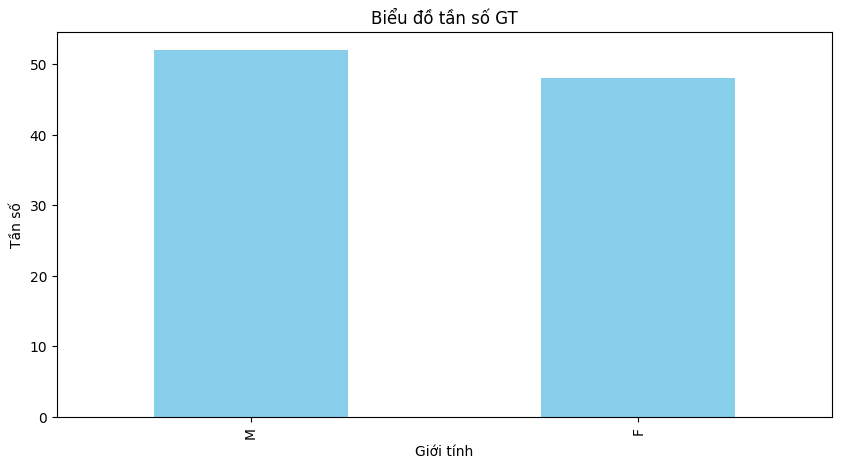

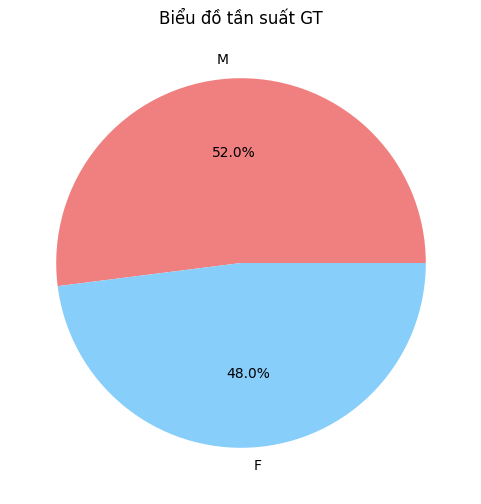

Mô tả dữ liệu US_TBM1:
count    100.000000
mean       2.434480
std        0.391203
min        1.616000
25%        2.107000
50%        2.480000
75%        2.724000
max        3.232000
Name: US_TBM1, dtype: float64
Mô tả dữ liệu US_TBM2:
count    100.000000
mean       2.559600
std        0.377656
min        1.768000
25%        2.223000
50%        2.588000
75%        2.893000
max        3.416000
Name: US_TBM2, dtype: float64
Mô tả dữ liệu US_TBM3:
count    100.00000
mean       2.67176
std        0.29981
min        1.91600
25%        2.47300
50%        2.70600
75%        2.87400
max        3.31600
Name: US_TBM3, dtype: float64
Dữ liệu DT của học sinh nam:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DT, dtype: float64
Dữ liệu KV của học sinh nam dân tộc Kinh đạt điểm yêu cầu:
count       0
unique      0
top       NaN
freq      NaN
Name: KV, dtype: object
Dữ liệu DH1, DH2, DH3 >= 5.0 và thuộc khu vực 2NT:
        STT   T1   L1

TypeError: no numeric data to plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")
df.head()
# 1. Sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
df_sorted_dh1 = df.sort_values(by="DH1")
print(df_sorted_dh1)

# 2. Sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
df_sorted_dh2_gt = df.sort_values(by=["GT", "DH2"])
print("Dữ liệu điểm DH2 sau khi sắp xếp tăng dần theo giới tính:")
print(df_sorted_dh2_gt.head())

# 3. Tạo pivot-table thống kê DH1 theo KT
pivot_kt = df.pivot_table(
    values="DH1",
    index="KT",
    aggfunc=[
        "count", "sum", "mean", "median", "min", "max", "std",
        lambda x: x.quantile(0.25),  # Q1
        lambda x: x.quantile(0.5),   # Q2 (median)
        lambda x: x.quantile(0.75)   # Q3
    ]
).rename(columns={
    "<lambda_0>": "Q1",
    "<lambda_1>": "Q2",
    "<lambda_2>": "Q3"
})
print("Pivot-table DH1 theo KT:")
print(pivot_kt)

# 4. Tạo pivot-table thống kê DH1 theo KT và KV
pivot_kt_kv = df.pivot_table(
    values="DH1",
    index=["KT", "KV"],
    aggfunc=["count", "sum", "mean", "median", "min", "max", "std", 
             lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
).rename(columns={
    "<lambda_0>": "Q1",
    "<lambda_1>": "Q2",
    "<lambda_2>": "Q3"
})
print("Pivot-table DH1 theo KT và KV:")
print(pivot_kt_kv)

# 5. Tạo pivot-table thống kê DH1 theo KT, KV và DT
pivot_kt_kv_dt = df.pivot_table(
    values="DH1",
    index=["KT", "KV", "DT"],
    aggfunc=["count", "sum", "mean", "median", "min", "max", "std", 
             lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)]
).rename(columns={
    "<lambda_0>": "Q1",
    "<lambda_1>": "Q2",
    "<lambda_2>": "Q3"
})
print("Pivot-table DH1 theo KT, KV và DT:")
print(pivot_kt_kv_dt)
# 6. Lập bảng tần số và tần suất của biến GT
gt_counts = df["GT"].value_counts()
gt_frequencies = df["GT"].value_counts(normalize=True) * 100
print("Bảng tần số GT:")
print(gt_counts)
print("Bảng tần suất GT (%):")
print(gt_frequencies)

# 7. Vẽ biểu đồ tần số (cột) và tần suất (tròn) của GT
plt.figure(figsize=(10, 5))
gt_counts.plot(kind='bar', color='skyblue', title='Biểu đồ tần số GT')
plt.xlabel('Giới tính')
plt.ylabel('Tần số')
plt.show()

plt.figure(figsize=(6, 6))
gt_frequencies.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], title='Biểu đồ tần suất GT')
plt.ylabel('')
plt.show()

# 8. Trình bày dữ liệu lần lượt của US_TBM1, US_TBM2, US_TBM3
print("Mô tả dữ liệu US_TBM1:")
print(df["US_TBM1"].describe())
print("Mô tả dữ liệu US_TBM2:")
print(df["US_TBM2"].describe())
print("Mô tả dữ liệu US_TBM3:")
print(df["US_TBM3"].describe())

# 9. Trình bày dữ liệu biến DT với học sinh là nam
dt_nam = df[df["GT"] == "Nam"]["DT"]
print("Dữ liệu DT của học sinh nam:")
print(dt_nam.describe())

# 10. Trình bày dữ liệu biến KV với học sinh nam thuộc dân tộc Kinh và có điểm đạt yêu cầu
kv_nam_kinh = df[(df["GT"] == "Nam") & (df["DT"] == "Kinh") & (df["DH1"] >= 5.0) & (df["DH2"] >= 4.0) & (df["DH3"] >= 4.0)]["KV"]
print("Dữ liệu KV của học sinh nam dân tộc Kinh đạt điểm yêu cầu:")
print(kv_nam_kinh.describe())

# 11. Trình bày dữ liệu DH1, DH2, DH3 lớn hơn hoặc bằng 5.0 và thuộc khu vực 2NT
dh_5_kv2nt = df[(df["DH1"] >= 5.0) & (df["DH2"] >= 5.0) & (df["DH3"] >= 5.0) & (df["KV"] == "2NT")]
print("Dữ liệu DH1, DH2, DH3 >= 5.0 và thuộc khu vực 2NT:")
print(dh_5_kv2nt.describe())



